Draw Figure S4

In [1]:
# import libraries
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

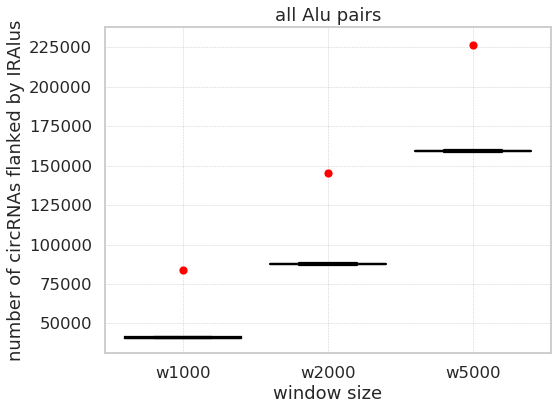

In [2]:
# number of randomized regions flanked by IRAlus - all windows
window = 1000
w1000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")
window = 2000
w2000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")
window = 5000
w5000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

w = pd.concat([w1000.iloc[:,[0]], w2000.iloc[:,[0]], w5000.iloc[:,[0]] ], axis = 1)
w.columns = ["w1000", "w2000", "w5000"]


melted_w = w.melt(var_name = "window", value_name = "number")

sns.set(style="whitegrid", context="talk")

plt.figure(figsize = (8,6))
sns.boxplot(x="window", y = "number", data = melted_w, palette = "Set2",
            showfliers = False,
            boxprops = dict(edgecolor = "black"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            medianprops=dict(color="black"))
sns.scatterplot(x="window", y= "number", data = melted_w.iloc[[0,10001,20002]], color = "red")

plt.title("all Alu pairs")
plt.xlabel("window size")
plt.ylabel("number of circRNAs flanked by IRAlus")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.savefig("all_Alu_pairs.tiff", format = "tiff", dpi = 300)
plt.show()
plt.close()

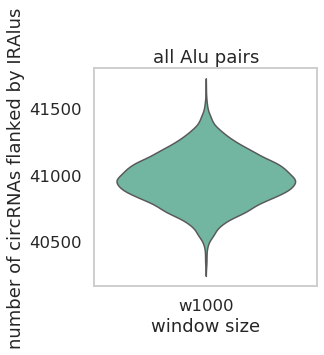

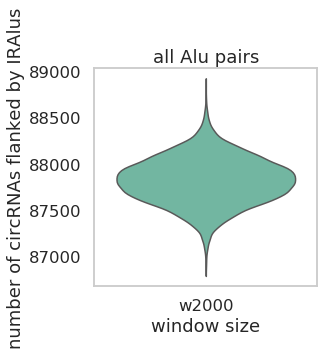

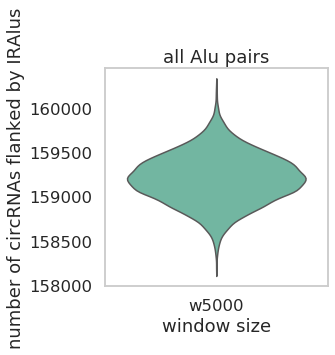

In [3]:
for i in range(3):
    melted_w = w.iloc[1:,[i]].melt(var_name = "window", value_name = "number")
    plt.figure(figsize = (4,4))
    sns.violinplot(x="window", y = "number", data = melted_w, palette = "Set2",
                   inner=None,
                   linewidth=1.5)

    plt.title("all Alu pairs")
    plt.xlabel("window size")
    plt.ylabel("number of circRNAs flanked by IRAlus")
    plt.grid(False)
    plt.savefig(f"all_Alu_pairs_violin_{i}.tiff", format = "tiff", dpi = 300)
    plt.show()
    plt.close()

In [4]:
# draw all hominoid_specific Alu categories for w1000, w2000, and w5000 individually

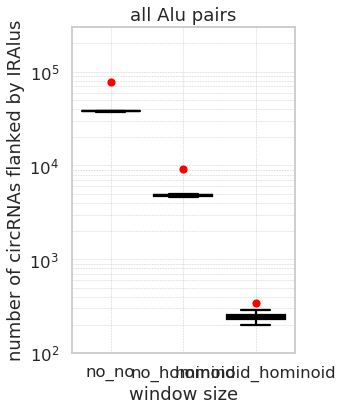

In [5]:
window = 1000
w1000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

w1000 = w1000.iloc[:,1:4]
melted_w1000 = w1000.melt(var_name = "category", value_name = "number")

sns.set(style="whitegrid", context="talk")

plt.figure(figsize = (4,6))
sns.boxplot(x="category", y = "number", data = melted_w1000, palette = "Set2",
            showfliers = False,
            boxprops = dict(edgecolor = "black"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            medianprops=dict(color="black"))
sns.scatterplot(x="category", y= "number", data = melted_w1000.iloc[[0,10001,20002]], color = "red")
# sns.stripplot(x="window", y = "number", data = melted_w, color = "black", alpha = 0.5, jitter = True, size = 8)

plt.title("all Alu pairs")
plt.xlabel("window size")
plt.ylabel("number of circRNAs flanked by IRAlus")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.yscale("log")
plt.ylim((100, 300000))
plt.savefig(f"w{window}/w{window}_hominoid_distribution.tiff", format = "tiff", dpi = 300)
plt.show()
plt.close()

In [6]:
window = 1000
w1000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

observed = w1000.iloc[0,:]
observed

all                  83574
no_no                78199
no_hominoid           9237
hominoid_hominoid      341
Name: 0, dtype: int64

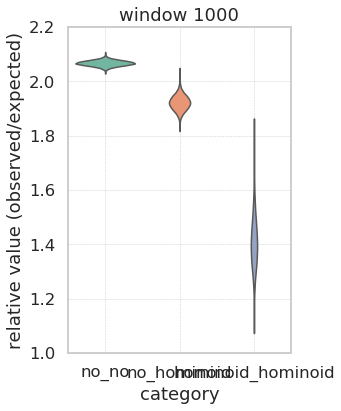

In [7]:
w1000 = w1000.iloc[1:,1:4]
w1000 = observed[1:4]/w1000
melted_w1000 = w1000.melt(var_name = "category", value_name = "relative")

plt.figure(figsize = (4,6))
sns.violinplot(x="category", y = "relative", data = melted_w1000, palette = "Set2", inner = None, linewidth = 1.5)
plt.title("window 1000")
plt.xlabel("category")
plt.ylabel("relative value (observed/expected)")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.ylim((1, 2.2))
plt.savefig(f"w{window}/w{window}_hominoid.tiff", format = "tiff", dpi = 300)

In [8]:
print(
    stats.mannwhitneyu(
        melted_w1000.loc[melted_w1000["category"] == "no_no", "relative"],
        melted_w1000.loc[melted_w1000["category"] == "no_hominoid", "relative"]
    ),
    stats.mannwhitneyu(
        melted_w1000.loc[melted_w1000["category"] == "no_no", "relative"],
        melted_w1000.loc[melted_w1000["category"] == "hominoid_hominoid", "relative"]
    ),
    stats.mannwhitneyu(
        melted_w1000.loc[melted_w1000["category"] == "no_hominoid", "relative"],
        melted_w1000.loc[melted_w1000["category"] == "hominoid_hominoid", "relative"]
    )
)

MannwhitneyuResult(statistic=36.0, pvalue=0.0) MannwhitneyuResult(statistic=0.0, pvalue=0.0) MannwhitneyuResult(statistic=7.0, pvalue=0.0)


In [9]:
melted_w1000.groupby("category")["relative"].mean()

category
hominoid_hominoid    1.408983
no_hominoid          1.921776
no_no                2.067157
Name: relative, dtype: float64

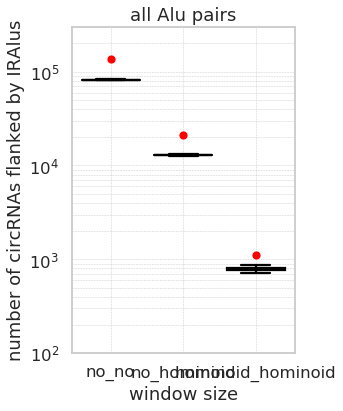

In [10]:
window = 2000
w2000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

w2000 = w2000.iloc[:,1:4]
melted_w2000 = w2000.melt(var_name = "category", value_name = "number")

sns.set(style="whitegrid", context="talk")

plt.figure(figsize = (4,6))
sns.boxplot(x="category", y = "number", data = melted_w2000, palette = "Set2",
            showfliers = False,
            boxprops = dict(edgecolor = "black"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            medianprops=dict(color="black"))
sns.scatterplot(x="category", y= "number", data = melted_w2000.iloc[[0,10001,20002]], color = "red")
# sns.stripplot(x="window", y = "number", data = melted_w, color = "black", alpha = 0.5, jitter = True, size = 8)

plt.title("all Alu pairs")
plt.xlabel("window size")
plt.ylabel("number of circRNAs flanked by IRAlus")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.yscale("log")
plt.ylim((100, 300000))
plt.savefig(f"w{window}/w{window}_hominoid_distribution.tiff", format = "tiff", dpi = 300)
plt.show()
plt.close()

In [11]:
window = 2000
w2000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

observed = w2000.iloc[0,:]
observed

all                  145384
no_no                137789
no_hominoid           21306
hominoid_hominoid      1103
Name: 0, dtype: int64

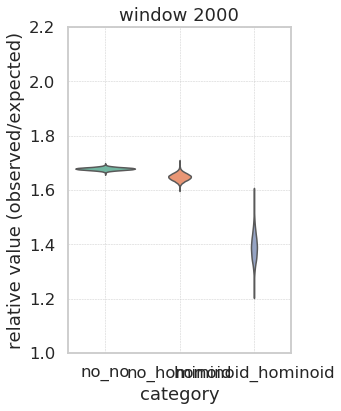

In [12]:
w2000 = w2000.iloc[1:,1:4]
w2000 = observed[1:4]/w2000
melted_w2000 = w2000.melt(var_name = "category", value_name = "relative")

plt.figure(figsize = (4,6))
sns.violinplot(x="category", y = "relative", data = melted_w2000, palette = "Set2", inner = None, linewidth = 1.5)
plt.title(f"window {window}")
plt.xlabel("category")
plt.ylabel("relative value (observed/expected)")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.ylim((1, 2.2))
plt.savefig(f"w{window}/w{window}_hominoid.tiff", format = "tiff", dpi = 300)

In [13]:
print(
    stats.mannwhitneyu(
        melted_w2000.loc[melted_w2000["category"] == "no_no", "relative"],
        melted_w2000.loc[melted_w2000["category"] == "no_hominoid", "relative"]
    ),
    stats.mannwhitneyu(
        melted_w2000.loc[melted_w2000["category"] == "no_no", "relative"],
        melted_w2000.loc[melted_w2000["category"] == "hominoid_hominoid", "relative"]
    ),
    stats.mannwhitneyu(
        melted_w2000.loc[melted_w2000["category"] == "no_hominoid", "relative"],
        melted_w2000.loc[melted_w2000["category"] == "hominoid_hominoid", "relative"]
    )
)

MannwhitneyuResult(statistic=1750518.0, pvalue=0.0) MannwhitneyuResult(statistic=0.0, pvalue=0.0) MannwhitneyuResult(statistic=0.0, pvalue=0.0)


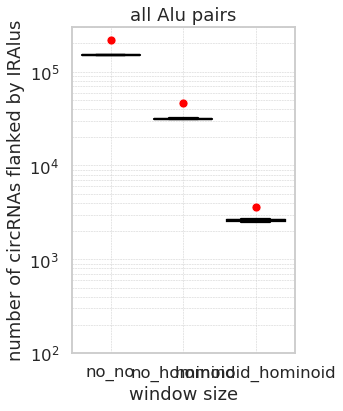

In [14]:
window = 5000
w5000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

w5000 = w5000.iloc[:,1:4]
melted_w5000 = w5000.melt(var_name = "category", value_name = "number")

sns.set(style="whitegrid", context="talk")

plt.figure(figsize = (4,6))
sns.boxplot(x="category", y = "number", data = melted_w5000, palette = "Set2",
            showfliers = False,
            boxprops = dict(edgecolor = "black"),
            whiskerprops=dict(color="black"),
            capprops=dict(color="black"),
            medianprops=dict(color="black"))
sns.scatterplot(x="category", y= "number", data = melted_w5000.iloc[[0,10001,20002]], color = "red")
# sns.stripplot(x="window", y = "number", data = melted_w, color = "black", alpha = 0.5, jitter = True, size = 8)

plt.title("all Alu pairs")
plt.xlabel("window size")
plt.ylabel("number of circRNAs flanked by IRAlus")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.yscale("log")
plt.ylim((100, 300000))
plt.savefig(f"w{window}/w{window}_hominoid_distribution.tiff", format = "tiff", dpi = 300)
plt.show()
plt.close()

In [15]:
window = 5000
w5000 = pd.read_csv(f'w{window}/result.csv', header=None, names=['all', "no_no", "no_hominoid", "hominoid_hominoid"], sep = "\t")

observed = w5000.iloc[0,:]
observed

all                  226620
no_no                216922
no_hominoid           46382
hominoid_hominoid      3646
Name: 0, dtype: int64

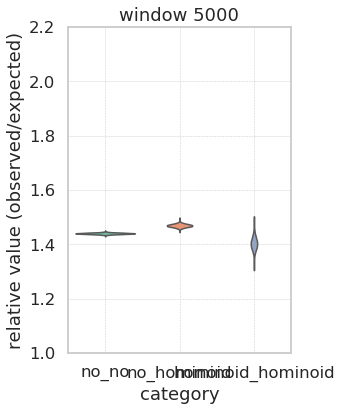

In [16]:
w5000 = w5000.iloc[1:,1:4]
w5000 = observed[1:4]/w5000
melted_w5000 = w5000.melt(var_name = "category", value_name = "relative")

plt.figure(figsize = (4,6))
sns.violinplot(x="category", y = "relative", data = melted_w5000, palette = "Set2", inner = None, linewidth = 1.5)
plt.title(f"window {window}")
plt.xlabel("category")
plt.ylabel("relative value (observed/expected)")
plt.grid(True, which = "both", ls="--", linewidth=0.5)
plt.ylim((1, 2.2))
plt.savefig(f"w{window}/w{window}_hominoid.tiff", format = "tiff", dpi = 300)

In [17]:
print(
    stats.mannwhitneyu(
        melted_w5000.loc[melted_w5000["category"] == "no_no", "relative"],
        melted_w5000.loc[melted_w5000["category"] == "no_hominoid", "relative"]
    ),
    stats.mannwhitneyu(
        melted_w5000.loc[melted_w5000["category"] == "no_no", "relative"],
        melted_w5000.loc[melted_w5000["category"] == "hominoid_hominoid", "relative"]
    ),
    stats.mannwhitneyu(
        melted_w5000.loc[melted_w5000["category"] == "no_hominoid", "relative"],
        melted_w5000.loc[melted_w5000["category"] == "hominoid_hominoid", "relative"]
    )
)

MannwhitneyuResult(statistic=134.0, pvalue=0.0) MannwhitneyuResult(statistic=6723968.0, pvalue=0.0) MannwhitneyuResult(statistic=411074.0, pvalue=0.0)
